In [1]:
#Flow: Data extraction, visualization, and modelling

#import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

#specify the url
quote_page = 'http://mmdatraffic.interaksyon.com/line-view-edsa.php'

# query the website and return the html to the variable ‘page’
page = urlopen(quote_page)

# parse the html 
soup = BeautifulSoup(page, 'html.parser')

In [2]:
#Data Extraction using Beautiful Soup

#set time stamp.
import time
ts = time.time()
import datetime
timestamp = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print("TIMESTAMP: "+ str(timestamp)+"\n")
stringdata = "TIMESTAMP: "+ str(timestamp)+"\n"+"\n"

#extract name of lines
list_of_names_html=soup.find_all('div',{'class':'line-name'})
list_of_names = []

for children in list_of_names_html:
    grandchildren = children.findChild("p")
    temp = grandchildren.get_text(separator=' ')
    temp = temp.split(' ')
    list_of_names.append(temp[0]) #NOTE: fix string separation
list_of_names.pop(0) 

#extract southbound/northbound volume
list_of_volume_html=soup.find_all('div',{'class':'line-status'})
list_of_southbound = []
list_of_northbound = []

i=1
for children in list_of_volume_html:
    temp = children.text
    temp = temp.split()
    
    if(temp[1]=="LIGHT"):
        temp[1]=0
    elif(temp[1]=="MODERATE"):
        temp[1]=1
    elif(temp[1]=="HEAVY"):
        temp[1]=2
    
    if(i%2 == 0):
        list_of_northbound.append(temp[1])
    else:
        list_of_southbound.append(temp[1])

    i=i+1

#save data into one variable
for i in range(len(list_of_names)):
    stringdata = stringdata + '{:>12}  {:>12}  {:>12}'.format(list_of_names[i], str(list_of_southbound[i]), str(list_of_northbound[i])) + "\n"

TIMESTAMP: 2019-04-25 15:50:28



In [3]:
#Save raw data into text file
filename = "rawdata_"+ str(timestamp)+".csv"
file = open(filename,"x")

#save all data into one string. 
file = open(filename,"a")
file.write(stringdata)   
file.close()

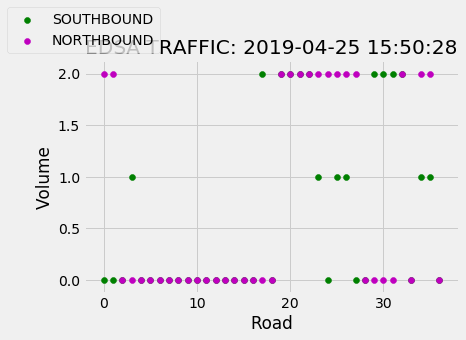

['2019-04-25 15:50:28']
[2]


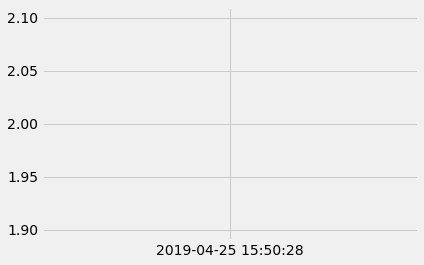

In [5]:
# Visualization using Matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

#Visualize overall EDSA traffic at certain timestamp
roadnum = range(0,len(list_of_names))
plt.scatter(roadnum, list_of_southbound, label="SOUTHBOUND", color="g")
plt.scatter(roadnum, list_of_northbound, label = "NORTHBOUND", color = "m")

#plt.xticks(np.arange(min(x), max(x)+1, 1.0)) IDK HOW TO WORK THIS YET.
#plt.yticks(np.arange(min(0), max(2)+1, 1.0))

plt.xlabel("Road")
plt.ylabel("Volume")

plt.title(label="EDSA TRAFFIC: "+timestamp)
plt.legend(bbox_to_anchor=(0, 1), loc='lower center', ncol=1)
plt.savefig("EDSA TRAFFIC: "+timestamp+".png") #finally, save the figure

#Visualize specific road parameters (TIMESTAMP vs VOLUME)--use animation.


#Pioneer-Boni. 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)


def animate(i):
    graph_data = open(filename,'r').read()

    xs = []
    ys = []
    
    xs.append(timestamp)
    ys.append(list_of_southbound[22])
    
    print(xs)
    print(ys)
    
    ax1.clear()
    ax1.plot(xs,ys)
    

ani = animation.FuncAnimation(fig, animate, interval = 600000000) #every 10 minutes, the graph will update
plt.show()